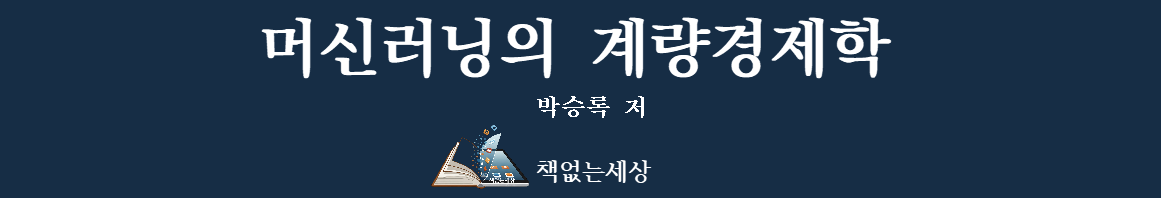

# Part 10: 딥러닝의 계량경제학

## Chapter 1. 다층 퍼셉트론과 케라스 기초

In [1]:
# 작업공간(working directory)지정  
import os  
os.chdir("E:/JupyterWDirectory/MyStock")
# 현재 작업공간(working directory)확인  
os.getcwd() 

import warnings
warnings.filterwarnings("ignore")

## 2. 케라스를 활용한 다층 퍼셉트론 모형의 구축

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 피마 인디언 당뇨병 데이터세트(Pima Indians Diabetes Dataset)
column_names = [
    "Pregnancies", "Glucose", "BloodPressure", "SkinThickness", 
    "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"
               ]
df = pd.read_csv('Data/pima-indians-diabetes.data.csv', header=None, names=column_names)
df.info()
display(df)

X = df.drop("Outcome", axis=1)  
y = df["Outcome"] 

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=12345)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
# 모형 정의
model = Sequential()
model.add(Dense(12, input_shape=(8,), activation='relu'))  # 첫 번째 은닉층
model.add(Dense(8, activation='relu'))                     # 두 번째 은닉층
model.add(Dense(1, activation='sigmoid'))                  # 출력층

# 모형 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모형 학습
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150, batch_size=10)

# 모델 평가
loss, accuracy = model.evaluate(X_test, y_test)
print('정확도: %.2f' % (accuracy * 100))

Epoch 1/150
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5664 - loss: 2.8226 - val_accuracy: 0.6535 - val_loss: 1.5795
Epoch 2/150
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5925 - loss: 1.4940 - val_accuracy: 0.6417 - val_loss: 1.3148
Epoch 3/150
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5588 - loss: 1.4288 - val_accuracy: 0.5591 - val_loss: 1.2077
Epoch 4/150
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5707 - loss: 1.3487 - val_accuracy: 0.6181 - val_loss: 0.9995
Epoch 5/150
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5980 - loss: 0.9469 - val_accuracy: 0.6220 - val_loss: 0.9348
Epoch 6/150
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6065 - loss: 1.0616 - val_accuracy: 0.6142 - val_loss: 0.8522
Epoch 7/150
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5730 - loss: 0.9248 - val_accuracy: 0.5748 - val_loss: 0.8131
Epoch 8/150
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6031 - loss: 0.8588 - val_accuracy: 0.6024 - v

In [11]:
# 예측 수행
predictions = model.predict(X_test)
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]
display(predictions)
display(binary_predictions)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


array([[0.07210131],
       [0.24412654],
       [0.670135  ],
       [0.84705377],
       [0.3315188 ],
       [0.2390566 ],
       [0.15106305],
       [0.11451396],
       [0.57972467],
       [0.07670792],
       [0.251586  ],
       [0.6356849 ],
       [0.31341815],
       [0.5771084 ],
       [0.40749297],
       [0.19685279],
       [0.21662487],
       [0.02845625],
       [0.5050969 ],
       [0.1482867 ],
       [0.4549814 ],
       [0.43504828],
       [0.17712145],
       [0.3896537 ],
       [0.06609628],
       [0.53516936],
       [0.7729396 ],
       [0.15273334],
       [0.38431633],
       [0.0602174 ],
       [0.347701  ],
       [0.08697873],
       [0.16116035],
       [0.17382313],
       [0.3215596 ],
       [0.1127612 ],
       [0.20378788],
       [0.24763644],
       [0.36992583],
       [0.28831643],
       [0.02144181],
       [0.20880799],
       [0.02577187],
       [0.23055398],
       [0.5439786 ],
       [0.21037318],
       [0.67401224],
       [0.326

[0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,


In [12]:
#  k-폴드 교차 검증(-Fold Cross-Validation)
from sklearn.model_selection import StratifiedKFold
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score

estimator = KerasClassifier(model=model, epochs=100, batch_size=5, verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, X, y, cv=kfold)
print("Baseline Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline Accuracy: 74.87% (3.66%)


In [5]:
from tensorflow.keras.models import save_model
save_model(model, "Model/model.keras")